In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# El rango de edad que aplica es de 44 a 84 años.
# Si, no cuenta con ninguna carateristica, no se hospitaliza 
df = pd.read_csv('hospitalizacion.csv')
df.head()

,COMPLICACION INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,1,1,0,0,0,0,1
1,1,1,0,0,0,0,1
2,1,1,0,0,0,0,1
3,1,0,0,0,0,0,1
4,1,1,1,1,1,1,1


In [3]:
# Separamos los dataset en X (features) y la y (variable objetivo)
X = df[['COMPLICACION INFECCIOSA','FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA']]
y = df['HOSPITALIZACION']

In [4]:
# Separamos el dataset en X_train, X_test, y_train y y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
# Instanciamos y  entrenamos sobre un árbol de decisión asignando una profundidad máxima arbitraria
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth= None, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
# Realizamos las predicciones

# Set de entrenamiento
y_train_pred = clf.predict(X_train)

# Set de testeo
y_test_pred = clf.predict(X_test)

In [7]:
# Evaluamos el rendimiento del modelo 
# Comparamos con las etiquetas reales
from sklearn.metrics import accuracy_score

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9565217391304348
Accuracy sobre conjunto de Test: 0.8333333333333334


In [8]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
matrix_train = confusion_matrix(y_train, y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

In [9]:
# Graficamos la matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_display_train = ConfusionMatrixDisplay(matrix_train)
cm_display_test = ConfusionMatrixDisplay(matrix_test)

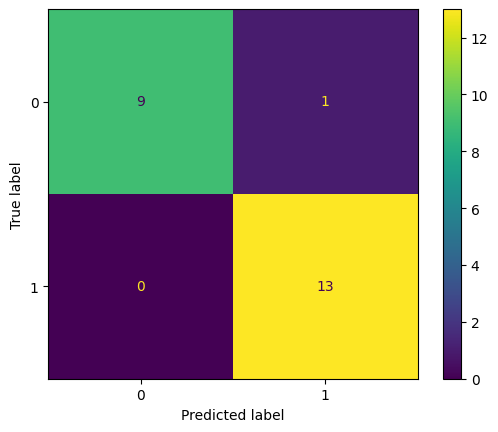

In [10]:
# Graficamos la matrix
cm_display_train.plot()
plt.show()

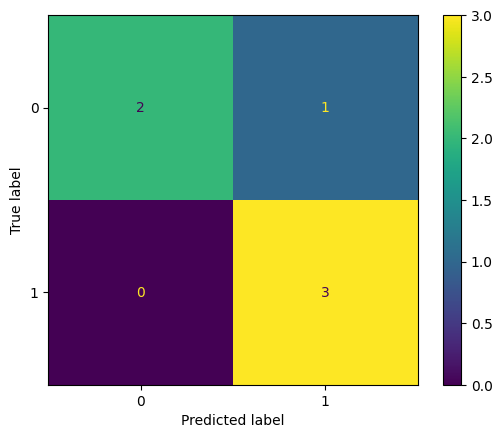

In [11]:
cm_display_test.plot()
plt.show()

In [12]:
from sklearn.metrics import f1_score

f1Score_Train = f1_score(y_train, y_train_pred, average= None)
f1Score_Test = f1_score(y_test, y_test_pred, average= None)
print(f1Score_Train)
print(f1Score_Test)

[0.94736842 0.96296296]
[0.8        0.85714286]


In [13]:
# Calcular el F1-score para la clase negativa (No hospitalización)
f1Score_negativo_train = f1_score(y_train, y_train_pred, pos_label=0)
f1Score_negativo_test = f1_score(y_test, y_test_pred, pos_label=0)

# Calcular el F1-score para la clase positiva (Sí requiere hospitalización)
f1Score_positivo_train = f1_score(y_train, y_train_pred, pos_label=1)
f1Score_positivo_test = f1_score(y_test, y_test_pred, pos_label=1)

print(f'F1-score para la clase negativa (No hospitalización) - Conjunto de entrenamiento: {f1Score_negativo_train:.2f}')
print(f'F1-score para la clase negativa (No hospitalización) - Conjunto de prueba: {f1Score_negativo_test:.2f}')
print(f'F1-score para la clase positiva (Sí requiere hospitalización) - Conjunto de entrenamiento: {f1Score_positivo_train:.2f}')
print(f'F1-score para la clase positiva (Sí requiere hospitalización) - Conjunto de prueba: {f1Score_positivo_test:.2f}')

F1-score para la clase negativa (No hospitalización) - Conjunto de entrenamiento: 0.95
F1-score para la clase negativa (No hospitalización) - Conjunto de prueba: 0.80
F1-score para la clase positiva (Sí requiere hospitalización) - Conjunto de entrenamiento: 0.96
F1-score para la clase positiva (Sí requiere hospitalización) - Conjunto de prueba: 0.86


In [14]:
# Importancia de las variables con respecto a la clasificación de la variable objetivo
importanciaVariables = clf.feature_importances_
importanciaVariables

array([0.99398771, 0.001913  , 0.        , 0.00409929, 0.        ,
       0.        ])

In [15]:
# Creamos un DataFrame para visualizar las importancias de las variables
importancias_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importanciaVariables})

# Ordenamos el DataFrame por importancia en orden descendente
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

importancias_df

,Variable,Importancia
0,COMPLICACION INFECCIOSA,0.993988
3,TIPO DE CULTIVO,0.004099
1,FIEBRE,0.001913
2,ITU,0.000000
4,AGENTE AISLADO,0.000000
5,PATRON DE RESISTENCIA,0.000000


In [19]:
# Verificamos la cantidad de nodos que representa el árbol de decisión.

nodos = clf.tree_.node_count
print(f'La cantidad de nodos del árbol de decisión es de: {nodos}.')

La cantidad de nodos del árbol de decisión es de: 7.


In [20]:
# Verificamos la optimización de los hiperparametros 
# Creamos la grilla para el arbol de decisiones

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 3, 5],
              }

In [21]:
# Instanciamos el modelo
clf2 = DecisionTreeClassifier(random_state=42)

In [22]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5)

#Entrenamos
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5]})

In [24]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None}
Mejor Score: 0.96

